# Baseball analytics

## Ideas

- Development over the years of:
    1. Salary
    2. Pitch speed
    3. Number of HR, SB etc.
- League average:
    1. Salary
    2. Pitch speed
- Year until player achieves:
    1. All star
    2. Gold Glove
    3. Slugger
- Correlation of player stats to wins

In [128]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np

In [5]:
teams_url = "https://www.baseball-reference.com/teams/"

In [9]:
def simple_get(url):
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content
            else:
                return None

    except RequestException as e:
        log_error('Erro during request to {0} : {1}'.format(url, str(e)))
        return None

def is_good_response(resp):
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200
            and content_type is not None
            and content_type.find('html') > -1)

def log_error(e):
    print(e)

In [126]:
def franchise_stat(row, stat):
    franchise = row.find(lambda tag: tag.name == 'td' and tag.has_attr('data-stat') and tag['data-stat'] == stat)
    if not franchise == None:
        return franchise
    else:
        return None

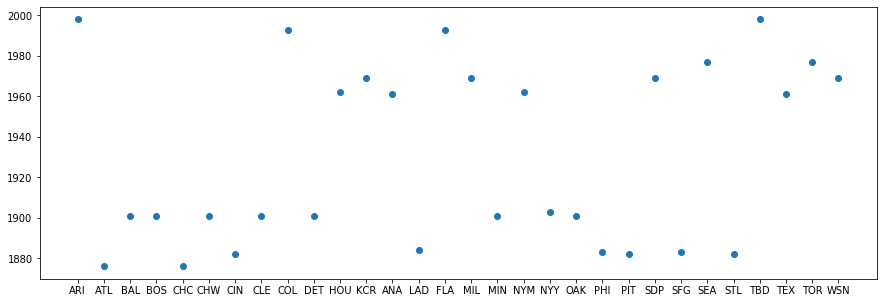

In [179]:
def abbreviation(franchise_row):
    if franchise_row:
        url = franchise_row.a['href']
        abbr = url.replace("/", "").replace("teams", "")
        if not (abbr == [] or abbr == 0):
            return abbr
    return None

def plot_teams(team_names, team_abbrs, team_years):
    x_axis_range = np.arange(1, len(team_names)+1)
    years_as_int = list(map(int, team_years))
    plt.figure(figsize=(15,5))
    plt.scatter(x_axis_range, years_as_int)
    plt.xticks(x_axis_range, team_abbrs)
    plt.show()

def get_active_team_table(html):
    bs = BeautifulSoup(html)
    table = bs.find(lambda tag: tag.name == 'table' and tag.has_attr('id') and tag['id'] == 'teams_active')
    rows = table.findAll(lambda tag: tag.name == 'tr')
    team_names = []
    team_abbrs = []
    team_years = []
    for r in rows:
        name = franchise_stat(r, 'franchise_name')
        abbr = abbreviation(franchise_stat(r, 'franchise_name'))
        year = franchise_stat(r, 'year_min')
        if not (name == None and year == None and abbr == None):
            team_names.append(name.text)
            team_abbrs.append(abbr)
            team_years.append(year.text)

    plot_teams(team_names, team_abbrs, team_years)

get_active_team_table(simple_get(teams_url))